In [21]:
import pandas as pd
df = pd.read_csv("healthcare-dataset-stroke-data.csv", delimiter=",", encoding = 'utf-8')
df["age"] = df["age"].astype(int)
df.drop('id', inplace=True, axis=1)
df.columns = df.columns.str.lower()
columns = list(df.columns)
for column in columns:
  if df[column].dtype == 'object':
    df[column] = df[column].str.lower()

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67,0,1,yes,private,urban,228.69,36.6,formerly smoked,1
1,female,61,0,0,yes,self-employed,rural,202.21,NaN,never smoked,1
2,male,80,0,1,yes,private,rural,105.92,32.5,never smoked,1
3,female,49,0,0,yes,private,urban,171.23,34.4,smokes,1
4,female,79,1,0,yes,self-employed,rural,174.12,24.0,never smoked,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int32  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 419.3+ KB


In [23]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [24]:
df['bmi'].fillna(round(df['bmi'].mean(), 1), inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [25]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67,0,1,yes,private,urban,228.69,36.6,formerly smoked,1
1,female,61,0,0,yes,self-employed,rural,202.21,28.9,never smoked,1
2,male,80,0,1,yes,private,rural,105.92,32.5,never smoked,1
3,female,49,0,0,yes,private,urban,171.23,34.4,smokes,1
4,female,79,1,0,yes,self-employed,rural,174.12,24.0,never smoked,1


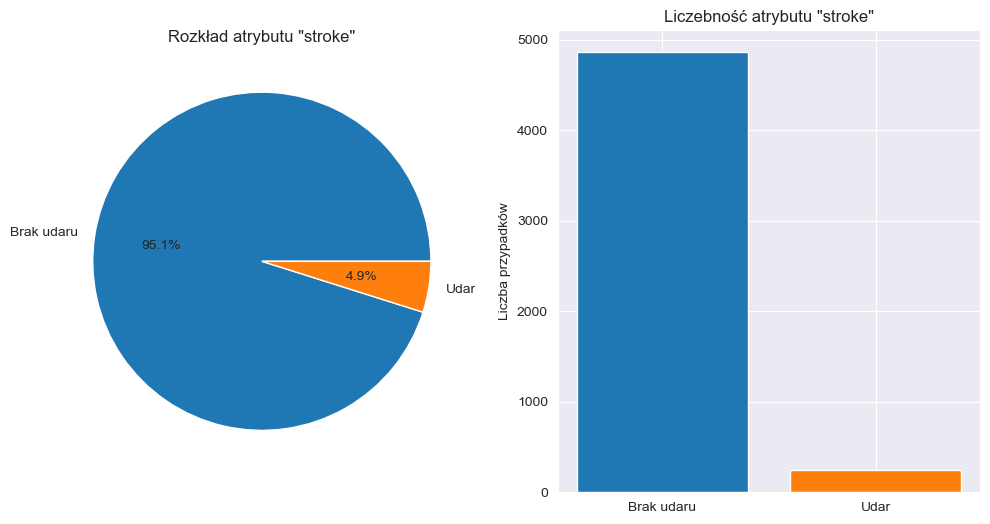

In [26]:
import matplotlib.pyplot as plt

labels = ['Brak udaru', 'Udar']
values = df['stroke'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=0)
ax1.set_title('Rozkład atrybutu "stroke"')

ax2.bar(labels, values, color=['tab:blue', 'tab:orange'])
ax2.set_title('Liczebność atrybutu "stroke"')
ax2.set_ylabel('Liczba przypadków')

plt.show()

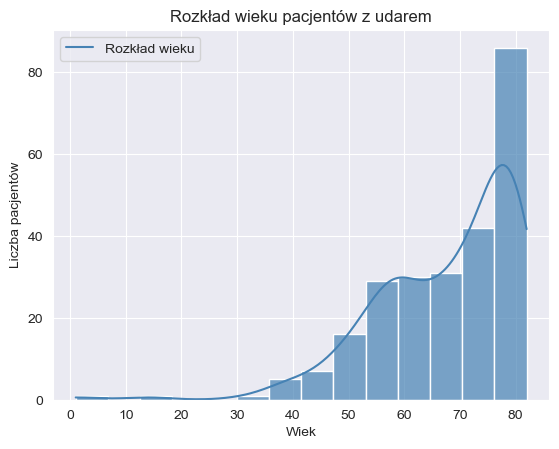

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

stroke_data = df[df['stroke'] == 1]['age']

sns.histplot(stroke_data, kde=True, color='steelblue', alpha=0.7)

plt.xlabel('Wiek')
plt.ylabel('Liczba pacjentów')
plt.title('Rozkład wieku pacjentów z udarem')

plt.legend(['Rozkład wieku'])

plt.show()

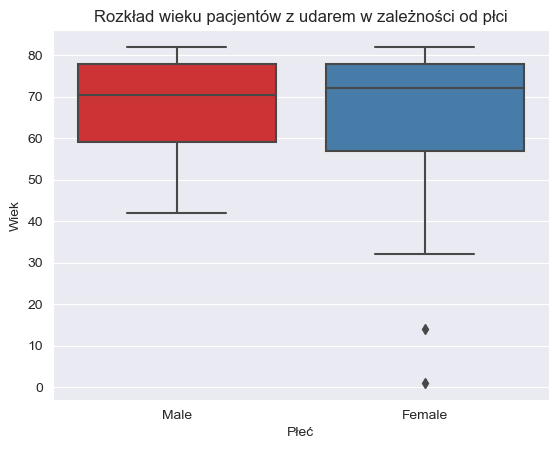

In [28]:
stroke_data = df[df['stroke'] == 1]
male_data = stroke_data[stroke_data['gender'] == 'male']['age']
female_data = stroke_data[stroke_data['gender'] == 'female']['age']

data = pd.DataFrame({'Male': male_data, 'Female': female_data})

sns.boxplot(data=data, palette='Set1')

plt.xlabel('Płeć')
plt.ylabel('Wiek')
plt.title('Rozkład wieku pacjentów z udarem w zależności od płci')

plt.show()
#oddstające wartości to dzieci i nie możemy ich pominąć

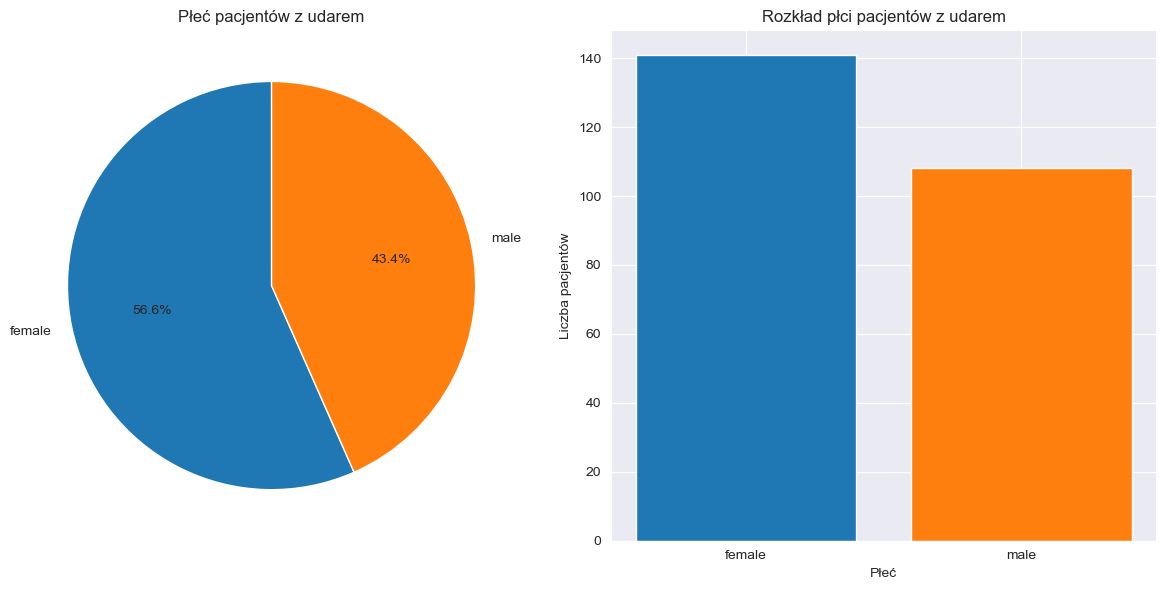

In [29]:
stroke_data = df[df['stroke'] == 1]

gender_counts = stroke_data['gender'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['tab:blue', 'tab:orange'])
ax1.set_title("Płeć pacjentów z udarem")

ax2.bar(gender_counts.index, gender_counts, color=['tab:blue', 'tab:orange'])
ax2.set_xlabel('Płeć')
ax2.set_ylabel('Liczba pacjentów')
ax2.set_title('Rozkład płci pacjentów z udarem')

plt.tight_layout()

plt.show()

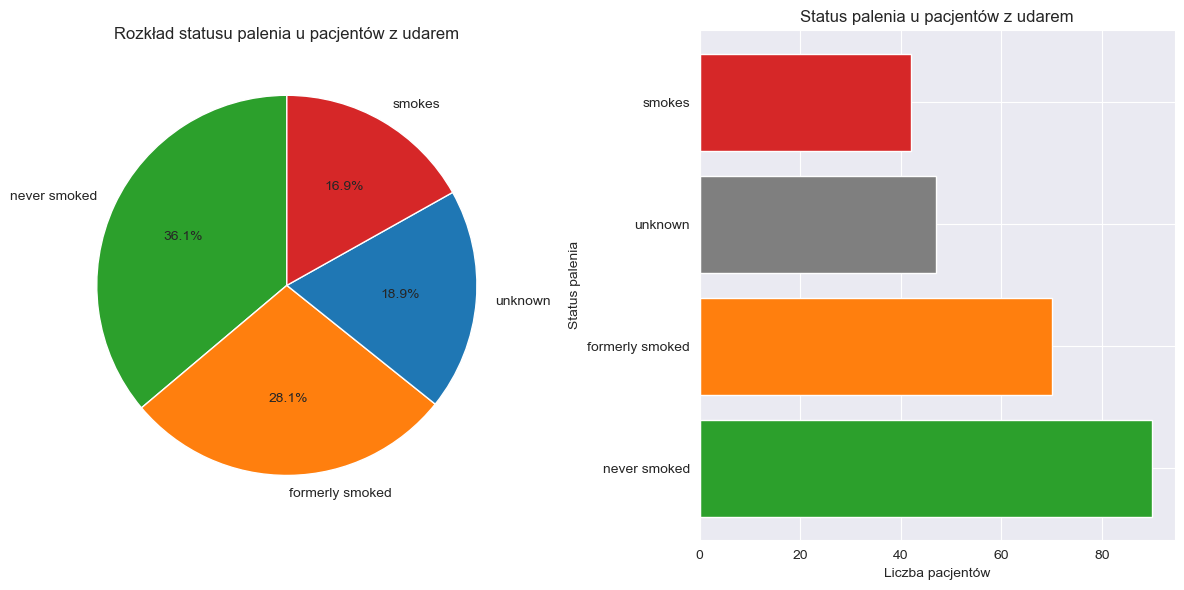

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

stroke_data = df[df['stroke'] == 1]
smoking_status_counts = stroke_data['smoking_status'].value_counts()

colors = {'formerly smoked': 'tab:orange', 'never smoked': 'tab:green', 'smokes': 'tab:red', 'Unknown': 'tab:gray'}

ax1.pie(smoking_status_counts, labels=smoking_status_counts.index, autopct='%1.1f%%', startangle=90, colors=[colors.get(status) for status in smoking_status_counts.index])
ax1.set_title('Rozkład statusu palenia u pacjentów z udarem')

ax2.barh(smoking_status_counts.index, smoking_status_counts.values, color=[colors.get(status, 'tab:gray') for status in smoking_status_counts.index])
ax2.set_xlabel('Liczba pacjentów')
ax2.set_ylabel('Status palenia')
ax2.set_title('Status palenia u pacjentów z udarem')

plt.tight_layout()

plt.show()

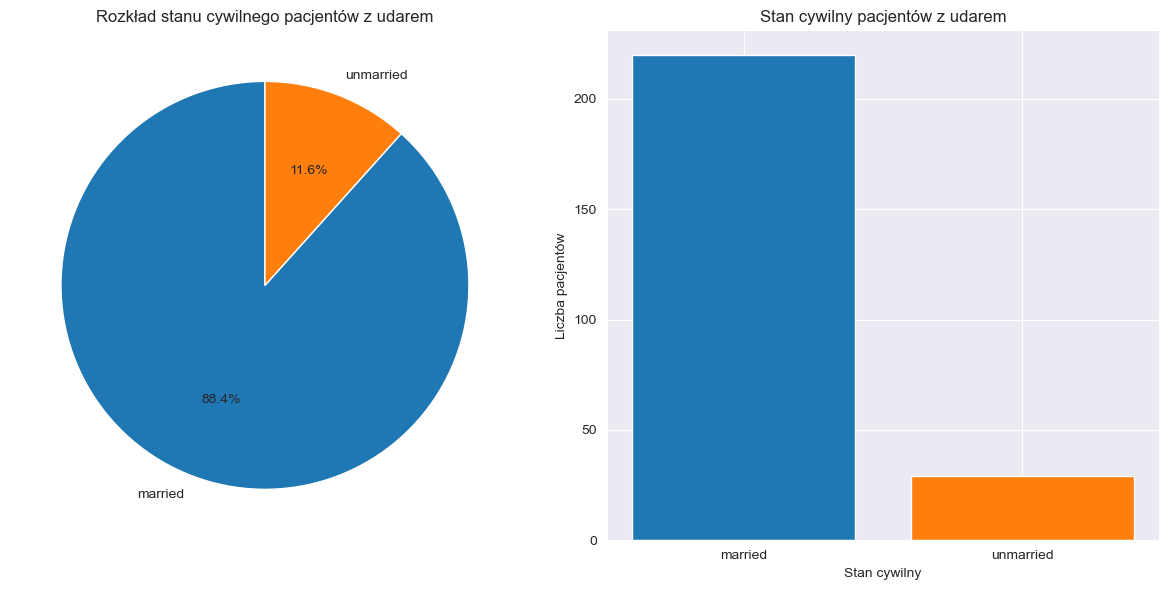

In [31]:
stroke_data = df[df['stroke'] == 1].copy()

stroke_data.loc[:, 'ever_married'] = stroke_data['ever_married'].replace({'yes': 'married', 'no': 'unmarried'})

marital_status_counts = stroke_data['ever_married'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['tab:blue', 'tab:orange'])
ax1.set_title("Rozkład stanu cywilnego pacjentów z udarem")

ax2.bar(marital_status_counts.index, marital_status_counts, color=['tab:blue', 'tab:orange'])
ax2.set_xlabel('Stan cywilny')
ax2.set_ylabel('Liczba pacjentów')
ax2.set_title('Stan cywilny pacjentów z udarem')

plt.tight_layout()

plt.show()

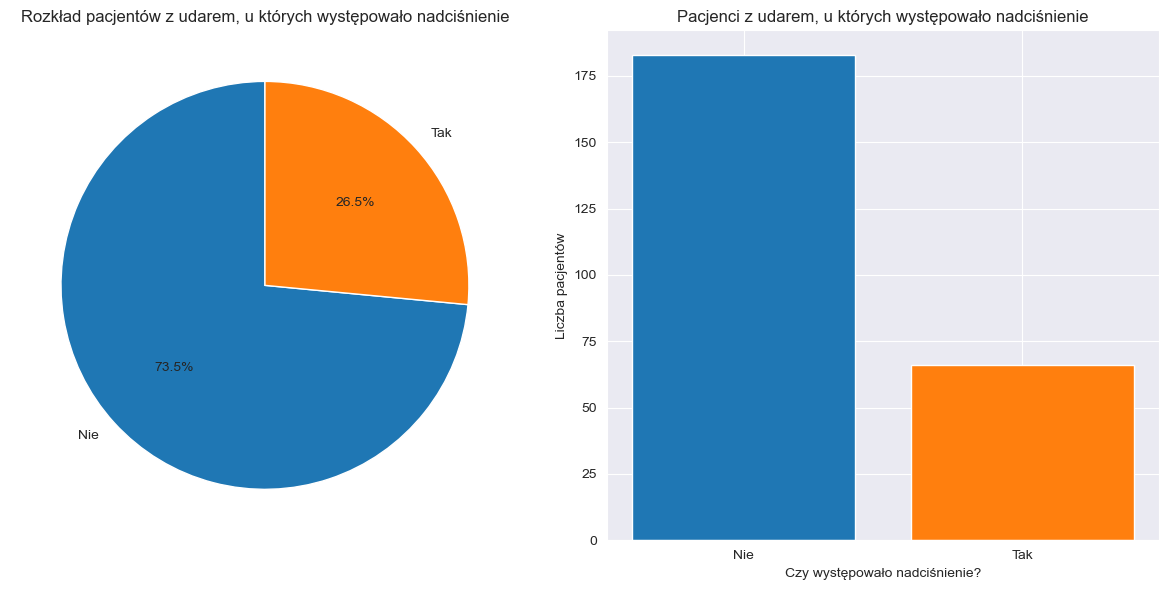

In [32]:
stroke_data = df[df['stroke'] == 1].copy()

stroke_data['hypertension'] = stroke_data['hypertension'].map({1: 'Tak', 0: 'Nie'})

hypertension_counts = stroke_data['hypertension'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(hypertension_counts, labels=hypertension_counts.index, autopct='%1.1f%%', startangle=90, colors=['tab:blue', 'tab:orange'])
ax1.set_title("Rozkład pacjentów z udarem, u których występowało nadciśnienie")

ax2.bar(hypertension_counts.index, hypertension_counts, color=['tab:blue', 'tab:orange'])
ax2.set_xlabel('Czy występowało nadciśnienie?')
ax2.set_ylabel('Liczba pacjentów')
ax2.set_title('Pacjenci z udarem, u których występowało nadciśnienie')

plt.tight_layout()

plt.show()

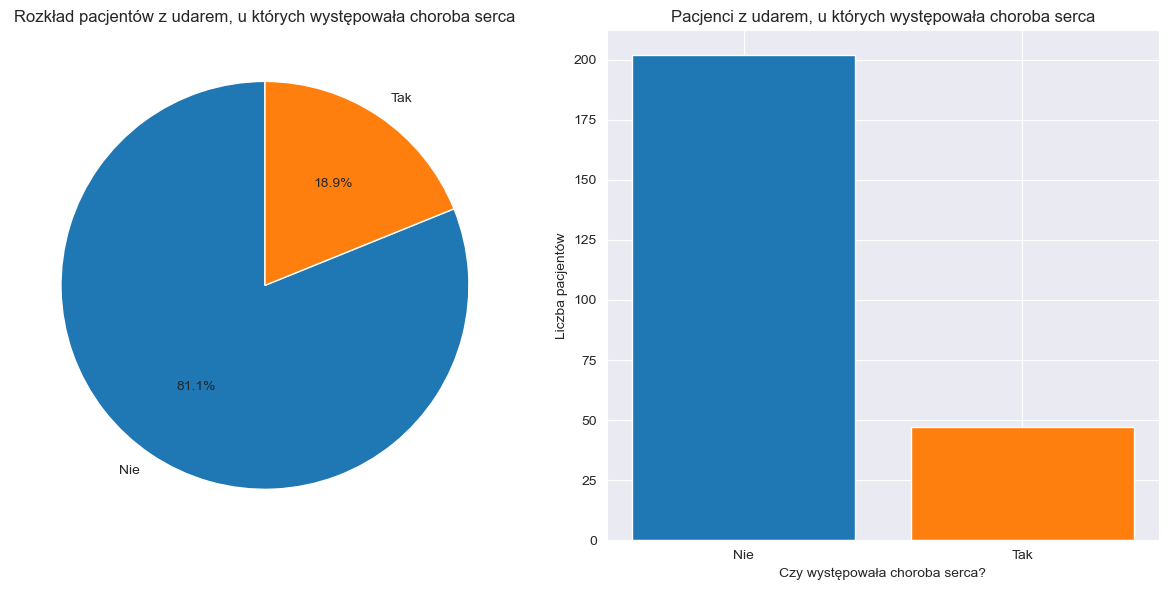

In [33]:
stroke_data = df[df['stroke'] == 1].copy()

stroke_data['heart_disease'] = stroke_data['heart_disease'].map({1: 'Tak', 0: 'Nie'})

hypertension_counts = stroke_data['heart_disease'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(hypertension_counts, labels=hypertension_counts.index, autopct='%1.1f%%', startangle=90, colors=['tab:blue', 'tab:orange'])
ax1.set_title("Rozkład pacjentów z udarem, u których występowała choroba serca")

ax2.bar(hypertension_counts.index, hypertension_counts, color=['tab:blue', 'tab:orange'])
ax2.set_xlabel('Czy występowała choroba serca?')
ax2.set_ylabel('Liczba pacjentów')
ax2.set_title('Pacjenci z udarem, u których występowała choroba serca')

plt.tight_layout()

plt.show()

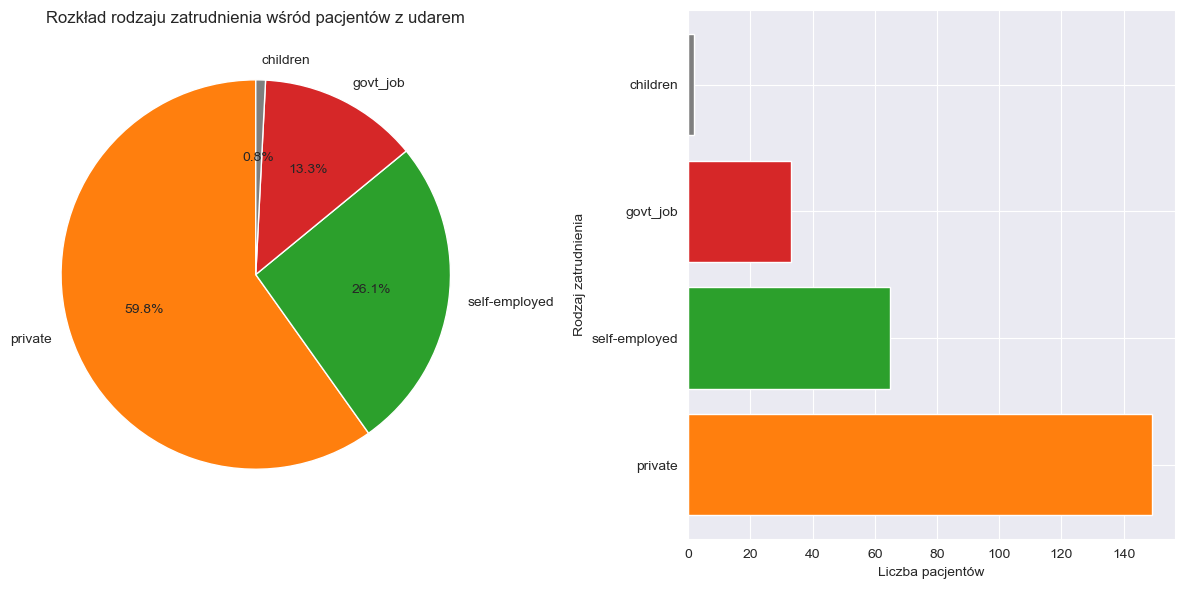

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

stroke_data = df[df['stroke'] == 1]
work_type_counts = stroke_data['work_type'].value_counts()

colors = {'private': 'tab:orange', 'self-employed': 'tab:green', 'govt_job': 'tab:red', 'never_worked': 'yellow', 'children': 'tab:gray'}

ax1.pie(work_type_counts, labels=work_type_counts.index, autopct='%1.1f%%', startangle=90, colors=[colors.get(status) for status in work_type_counts.index])
ax1.set_title('Rozkład rodzaju zatrudnienia wśród pacjentów z udarem')

ax2.barh(work_type_counts.index, work_type_counts.values, color=[colors.get(status, 'tab:gray') for status in work_type_counts.index])
ax2.set_xlabel('Liczba pacjentów')
ax2.set_ylabel('Rodzaj zatrudnienia')

plt.tight_layout()

plt.show()

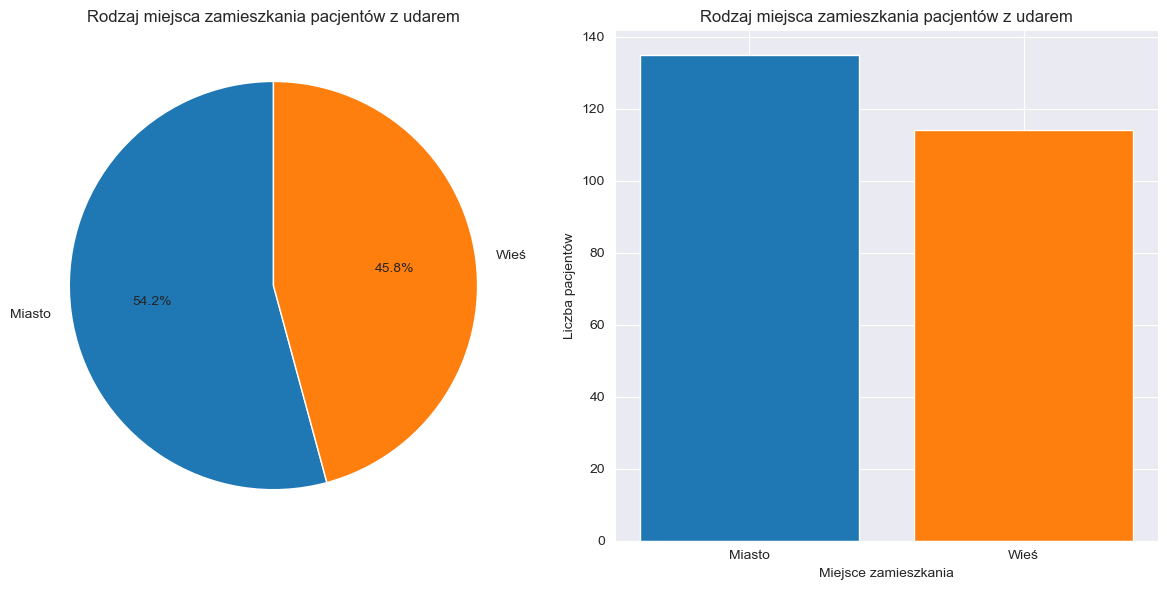

In [35]:
stroke_data = df[df['stroke'] == 1].copy()
stroke_data.loc[:, 'residence_type'] = stroke_data['residence_type'].replace({'urban': 'Miasto', 'rural': 'Wieś'})

gender_counts = stroke_data['residence_type'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['tab:blue', 'tab:orange'])
ax1.set_title("Rodzaj miejsca zamieszkania pacjentów z udarem")

ax2.bar(gender_counts.index, gender_counts, color=['tab:blue', 'tab:orange'])
ax2.set_xlabel('Miejsce zamieszkania')
ax2.set_ylabel('Liczba pacjentów')
ax2.set_title('Rodzaj miejsca zamieszkania pacjentów z udarem')

plt.tight_layout()
plt.show()

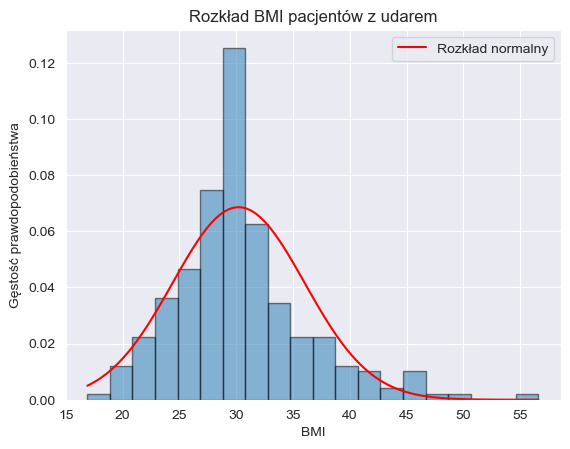

In [36]:
from scipy.stats import norm
import numpy as np

stroke_data = df[df['stroke'] == 1]

plt.hist(stroke_data['bmi'], bins=20, density=True, edgecolor='black', alpha=0.5)

mean_bmi = np.mean(stroke_data['bmi'])
std_bmi = np.std(stroke_data['bmi'])
x = np.linspace(min(stroke_data['bmi']), max(stroke_data['bmi']), 100)
y = norm.pdf(x, mean_bmi, std_bmi)
plt.plot(x, y, 'r-', label='Rozkład normalny')

plt.title('Rozkład BMI pacjentów z udarem')
plt.xlabel('BMI')
plt.ylabel('Gęstość prawdopodobieństwa')

plt.legend()

plt.show()

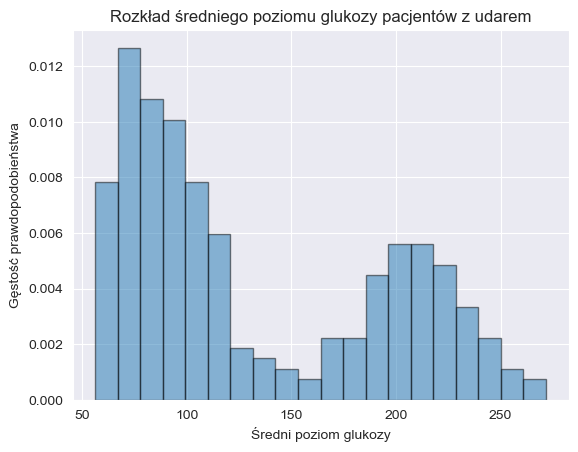

In [37]:
stroke_data = df[df['stroke'] == 1]

plt.hist(stroke_data['avg_glucose_level'], bins=20, density=True, edgecolor='black', alpha=0.5)

plt.title('Rozkład średniego poziomu glukozy pacjentów z udarem')
plt.xlabel('Średni poziom glukozy')
plt.ylabel('Gęstość prawdopodobieństwa')

plt.show()

In [38]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoder = LabelEncoder()
columns_to_encode = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

for column in columns_to_encode:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
    print(f"Przypisanie dla kolumny {column}:")
    print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
    print()

df_encoded.head()

Przypisanie dla kolumny gender:
{'female': 0, 'male': 1, 'other': 2}

Przypisanie dla kolumny ever_married:
{'no': 0, 'yes': 1}

Przypisanie dla kolumny work_type:
{'children': 0, 'govt_job': 1, 'never_worked': 2, 'private': 3, 'self-employed': 4}

Przypisanie dla kolumny residence_type:
{'rural': 0, 'urban': 1}

Przypisanie dla kolumny smoking_status:
{'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'unknown': 3}


,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,3,1,228.69,36.6,0,1
1,0,61,0,0,1,4,0,202.21,28.9,1,1
2,1,80,0,1,1,3,0,105.92,32.5,1,1
3,0,49,0,0,1,3,1,171.23,34.4,2,1
4,0,79,1,0,1,4,0,174.12,24.0,1,1


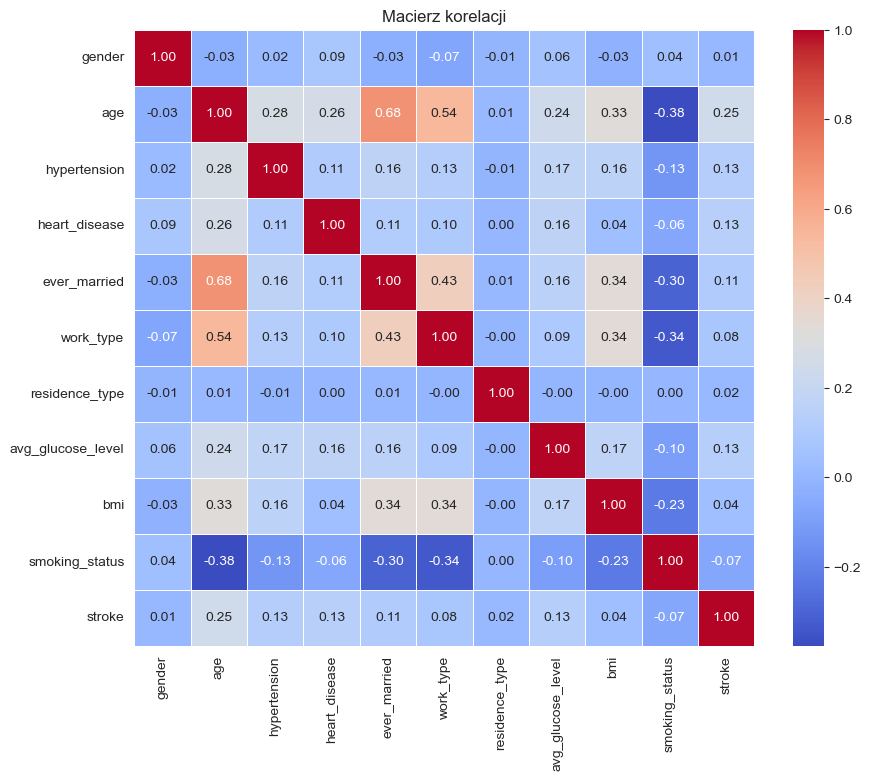

In [39]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Macierz korelacji")
plt.show()

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score

X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

#muszę użyć smote bo rozkład danych jest kiepski
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
logistic_regression_model = LogisticRegression(random_state=42)
randomforest_model = RandomForestClassifier(random_state=42)

cv_scores_rf = cross_val_score(randomforest_model, X_train_scaled, y_train, cv=5)
mean_cv_score_rf = round(cv_scores_rf.mean(), 3)
print('Random Forest Mean Cross-Validation Score:', mean_cv_score_rf)

cv_scores_lr = cross_val_score(logistic_regression_model, X_train_scaled, y_train, cv=5)
mean_cv_score_lr = round(cv_scores_lr.mean(), 3)
print('Logistic Regression Mean Cross-Validation Score:', mean_cv_score_lr)

cv_scores_knn = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
mean_cv_score_knn = round(cv_scores_knn.mean(), 3)
print('kNN Mean Cross-Validation Score:', mean_cv_score_knn)

Random Forest Mean Cross-Validation Score: 0.927
Logistic Regression Mean Cross-Validation Score: 0.808


C:\Users\lespa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lespa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

kNN Mean Cross-Validation Score: 0.861


C:\Users\lespa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lespa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

RandomForestClassifierModel Train Score is: 1.0
RandomForestClassifierModel Test Score is: 0.935
Accuracy: 0.935
Precision: 0.917
Recall: 0.957
F1 Score: 0.937
Confusion Matrix:


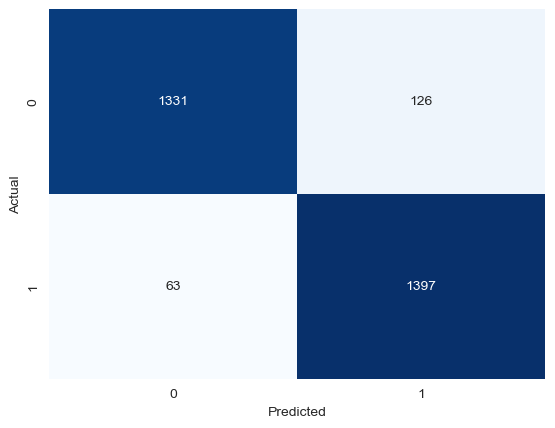

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

randomforest_model = RandomForestClassifier(random_state=42)
randomforest_model.fit(X_train_scaled, y_train)

train_score = round(randomforest_model.score(X_train_scaled, y_train), 3)
test_score = round(randomforest_model.score(X_test_scaled, y_test), 3)

print('RandomForestClassifierModel Train Score is:', train_score)
print('RandomForestClassifierModel Test Score is:', test_score)

y_pred = randomforest_model.predict(X_test_scaled)

accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred, zero_division=1), 3)
recall = round(recall_score(y_test, y_pred, zero_division=1), 3)
f1 = round(f1_score(y_test, y_pred, zero_division=1), 3)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression Model Train Score: 0.8
Logistic Regression Model Test Score: 0.793
Accuracy: 0.793
Precision: 0.785
Recall: 0.808
F1 Score: 0.796
Confusion Matrix:


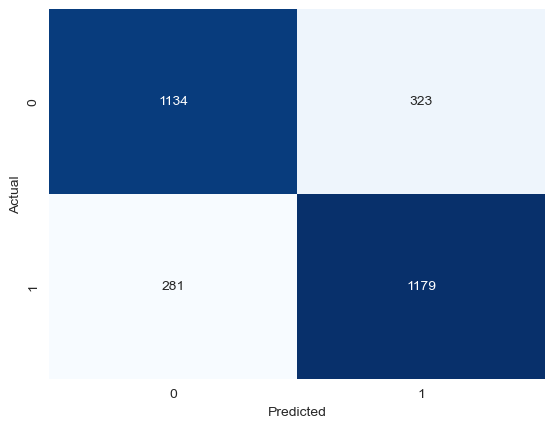

In [42]:
# #if LogisticRegression was was the best model
# from sklearn.linear_model import LogisticRegression
# 
# logistic_regression_model = LogisticRegression(random_state=42)
# logistic_regression_model.fit(X_train_scaled, y_train)
# 
# train_score = round(logistic_regression_model.score(X_train_scaled, y_train), 3)
# test_score = round(logistic_regression_model.score(X_test_scaled, y_test), 3)
# 
# print('Logistic Regression Model Train Score:', train_score)
# print('Logistic Regression Model Test Score:', test_score)
# 
# y_pred = logistic_regression_model.predict(X_test_scaled)
# 
# accuracy = round(accuracy_score(y_test, y_pred), 3)
# precision = round(precision_score(y_test, y_pred, zero_division=1), 3)
# recall = round(recall_score(y_test, y_pred, zero_division=1), 3)
# f1 = round(f1_score(y_test, y_pred, zero_division=1), 3)
# 
# print('Accuracy:', accuracy)
# print('Precision:', precision)
# print('Recall:', recall)
# print('F1 Score:', f1)
# 
# cm = confusion_matrix(y_test, y_pred)
# 
# print("Confusion Matrix:")
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

C:\Users\lespa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lespa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

kNN Model Train Score: 0.91
kNN Model Test Score: 0.866
Accuracy: 0.866
Precision: 0.824
Recall: 0.931
F1 Score: 0.874
Confusion Matrix:


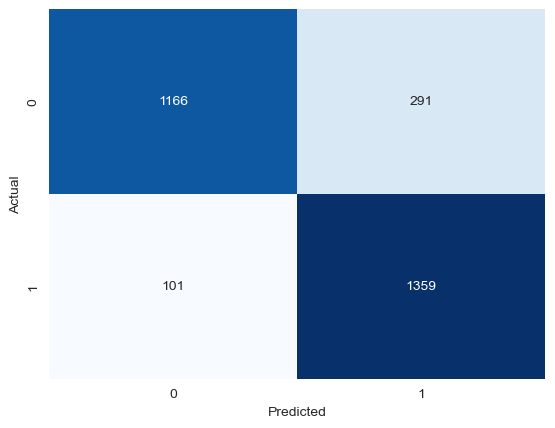

In [43]:
# # #if KNeighborsClassifier was was the best model
# from sklearn.neighbors import KNeighborsClassifier
# 
# knn_model = KNeighborsClassifier(n_neighbors=5)
# knn_model.fit(X_train_scaled, y_train)
# 
# train_score = round(knn_model.score(X_train_scaled, y_train), 3)
# test_score = round(knn_model.score(X_test_scaled, y_test), 3)
# 
# print('kNN Model Train Score:', train_score)
# print('kNN Model Test Score:', test_score)
# 
# y_pred = knn_model.predict(X_test_scaled)
# 
# accuracy = round(accuracy_score(y_test, y_pred), 3)
# precision = round(precision_score(y_test, y_pred, zero_division=1), 3)
# recall = round(recall_score(y_test, y_pred, zero_division=1), 3)
# f1 = round(f1_score(y_test, y_pred, zero_division=1), 3)
# 
# print('Accuracy:', accuracy)
# print('Precision:', precision)
# print('Recall:', recall)
# print('F1 Score:', f1)
# 
# cm = confusion_matrix(y_test, y_pred)
# 
# print("Confusion Matrix:")
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()